In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt

import os
import glob

from nfl import Team, Game, Play, Player

In [2]:
games = pd.read_csv('data/games.csv')

In [3]:
players = pd.read_csv('data/players.csv').set_index('nflId')

In [4]:
plays = pd.read_csv('data/plays.csv')

In [5]:
weeks = {}
for i in range(1):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join('data',name+'.csv'))

In [6]:
team_names = games['homeTeamAbbr'].unique()

In [7]:
teams = {}
for name in team_names:
    teams[name] = Team(abbr=name)

In [8]:
for i in range(games.shape[0]):
    _game_info = games.loc[i]
    gameId = _game_info['gameId']
    homeTeamAbbr = _game_info['homeTeamAbbr']
    visitorTeamAbbr = _game_info['visitorTeamAbbr']
    week = _game_info['week']
    
    game_plays = plays[plays['gameId'] == gameId]
    home_game_plays = game_plays[game_plays['possessionTeam']==homeTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    away_game_plays = game_plays[game_plays['possessionTeam']==visitorTeamAbbr].sort_values(by=['playId']).reset_index(drop=True)
    
    teams[homeTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=visitorTeamAbbr,game_info=_game_info,
                                                    play_data=away_game_plays,location='home')
    teams[visitorTeamAbbr].games[f'week{week}'] = Game(gameId,opponent=homeTeamAbbr,game_info=_game_info,
                                                    play_data=home_game_plays,location='away')

In [9]:
team = teams['IND']

In [10]:
for key in ('week1',):
    game = team.games[key]
    
    week_data = weeks[key]
    
    for i in game.play_data.index:
        play = game.play_data.loc[i]
        tracking_data = week_data[(week_data['gameId']==play['gameId'])&(week_data['playId']==play['playId'])]
        player_tracking = tracking_data[tracking_data['nflId'].notna()]
        fb_tracking = tracking_data[tracking_data['displayName']=='Football'].sort_values(by='frameId').reset_index(drop=True)
        
        game.plays.append(Play(play['playId'],play_data=play,player_tracking=player_tracking,
                               fb_tracking=fb_tracking,defensive_team=game.location))

In [11]:
game = team.games['week1']

In [12]:
game.opponent

'CIN'

In [13]:
game.location

'home'

In [14]:
play = game.plays[24]

In [15]:
print(play)

(13:23) A.Dalton pass short right to J.Mixon to IND 9 for 15 yards (C.Geathers).


In [16]:
play.play_data

gameId                                                           2018090902
playId                                                                 3299
playDescription           (13:23) A.Dalton pass short right to J.Mixon t...
quarter                                                                   4
down                                                                      1
yardsToGo                                                                10
possessionTeam                                                          CIN
playType                                                     play_type_pass
yardlineSide                                                            IND
yardlineNumber                                                           24
offenseFormation                                                 SINGLEBACK
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPass

In [17]:
play.player_tracking

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
439989,2018-09-09T19:26:55.400Z,35.76,29.43,0.00,0.00,0.00,285.70,175.65,None,2495143.0,Andy Dalton,14.0,QB,1,away,2018090902,3299,left,NaN
439990,2018-09-09T19:26:55.400Z,34.79,48.05,0.00,0.00,0.00,251.59,27.25,None,2495450.0,A.J. Green,18.0,WR,1,away,2018090902,3299,left,HITCH
439991,2018-09-09T19:26:55.400Z,21.52,37.89,0.18,0.69,0.02,166.32,139.42,None,2552386.0,Clayton Geathers,26.0,FS,1,home,2018090902,3299,left,NaN
439992,2018-09-09T19:26:55.400Z,35.49,24.57,0.00,0.00,0.01,331.99,2.87,None,2552586.0,Tyler Kroft,81.0,TE,1,away,2018090902,3299,left,NaN
439993,2018-09-09T19:26:55.400Z,36.54,16.92,0.85,1.31,0.08,234.43,98.04,None,2555466.0,Tyler Boyd,83.0,WR,1,away,2018090902,3299,left,GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441019,2018-09-09T19:27:02.700Z,18.53,39.85,2.55,4.42,0.28,17.66,331.62,None,2558060.0,Malik Hooker,29.0,FS,74,home,2018090902,3299,left,NaN
441020,2018-09-09T19:27:02.700Z,20.46,48.27,2.91,0.96,0.29,211.59,231.58,None,2558108.0,Nate Hairston,27.0,CB,74,home,2018090902,3299,left,NaN
441021,2018-09-09T19:27:02.700Z,19.23,33.26,6.35,2.40,0.65,345.40,330.37,None,2558976.0,Kenny Moore,23.0,CB,74,home,2018090902,3299,left,NaN
441022,2018-09-09T19:27:02.700Z,19.40,42.00,4.19,2.34,0.43,225.87,231.47,None,2560789.0,Darius Leonard,53.0,LB,74,home,2018090902,3299,left,NaN


In [18]:
play.defensive_team

'home'

In [19]:
play.process_players(players)

In [20]:
play.players

{'offense': {2495143: <nfl.Player at 0x11de382b0>,
  2495450: <nfl.Player at 0x11de7b3c8>,
  2552586: <nfl.Player at 0x11de38da0>,
  2555466: <nfl.Player at 0x11de38978>,
  2557976: <nfl.Player at 0x11de38c50>,
  2558010: <nfl.Player at 0x11de38940>},
 'defense': {2552386: <nfl.Player at 0x11de7b780>,
  2557961: <nfl.Player at 0x11d9387f0>,
  2558060: <nfl.Player at 0x11de7b8d0>,
  2558108: <nfl.Player at 0x11de7b9e8>,
  2558976: <nfl.Player at 0x11de7bb00>,
  2560789: <nfl.Player at 0x11de7bc88>,
  2560816: <nfl.Player at 0x11de7bdd8>}}

In [21]:
play.events

{'ball_snap': 11,
 'play_action': 23,
 'pass_forward': 33,
 'pass_arrived': 39,
 'pass_outcome_caught': 40,
 'first_contact': 64,
 'tackle': 73}

In [22]:
play.line_of_scrimmage

34.17

In [23]:
play.outcome_event

'pass_outcome_caught'

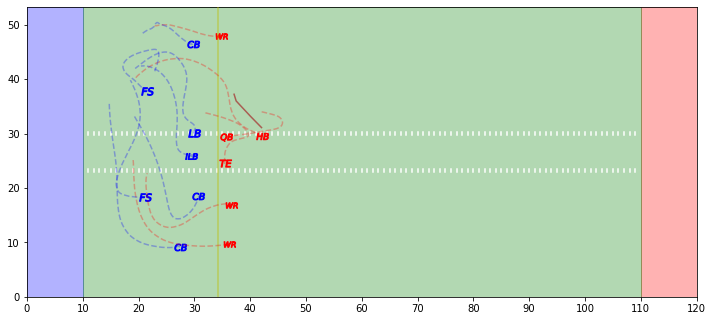

In [24]:
play.plot_play(scale=1,markers='position')

In [25]:
play.players

{'offense': {2495143: <nfl.Player at 0x11de382b0>,
  2495450: <nfl.Player at 0x11de7b3c8>,
  2552586: <nfl.Player at 0x11de38da0>,
  2555466: <nfl.Player at 0x11de38978>,
  2557976: <nfl.Player at 0x11de38c50>,
  2558010: <nfl.Player at 0x11de38940>},
 'defense': {2552386: <nfl.Player at 0x11de7b780>,
  2557961: <nfl.Player at 0x11d9387f0>,
  2558060: <nfl.Player at 0x11de7b8d0>,
  2558108: <nfl.Player at 0x11de7b9e8>,
  2558976: <nfl.Player at 0x11de7bb00>,
  2560789: <nfl.Player at 0x11de7bc88>,
  2560816: <nfl.Player at 0x11de7bdd8>}}

In [26]:
start = play.events['ball_snap']
ball_x = play.fb_tracking.loc[start-1,'x']
ball_y = play.fb_tracking.loc[start-1,'y']
for side in ('offense','defense'):
    for player in play.players[side].values():
        x = player.tracking_data.loc[start-1,'x']
        y = player.tracking_data.loc[start-1,'y']
        
        dx = x - ball_x
        dy = y - ball_y
        
        player.start_pos = (dx,dy)

In [31]:
play.players['offense'][2495143].name

'Andy Dalton'

In [30]:
play.players['offense'][2495143].position

'QB'

In [38]:
state = play.players['offense'][2495143].tracking_data[['x','y','s','a']]

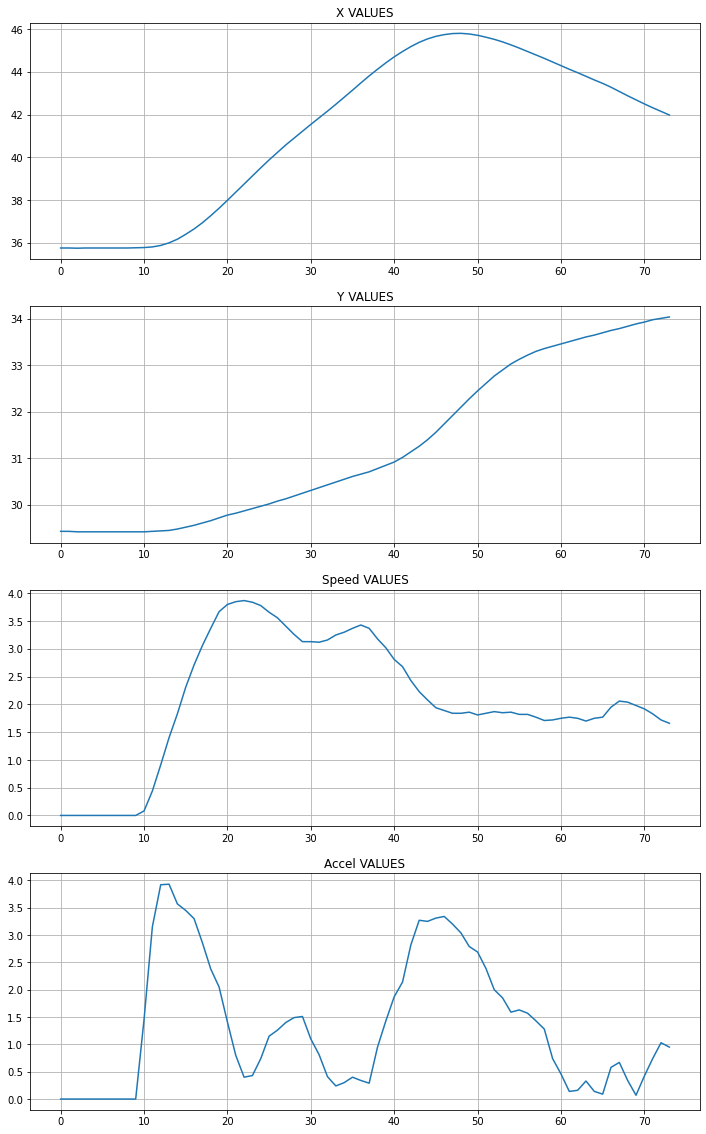

In [46]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))

ax1.set_title("X VALUES")
ax1.plot(state['x'].values)

ax2.set_title("Y VALUES")
ax2.plot(state['y'].values)

ax3.set_title("Speed VALUES")
ax3.plot(state['s'].values)

ax4.set_title("Accel VALUES")
ax4.plot(state['a'].values)

for ax in (ax1,ax2,ax3,ax4):
    ax.grid()

plt.show()